# Assignment 4:  Web Scraping Exercise

In this assignment, we will use web scraping to automate the process of getting data from the CORGIS website and visualizing it.
* You can add any number of extra code cells below that you want.

We are going to retrieve a list of all the CORGIS CSV Datasets.  To do this, include the following steps in the cell below:
* Import requests and BeautifulSoup
* Use `requests.get` to retrieve the html code of the CORGIS [CSV Datasets](https://corgis-edu.github.io/corgis/csv/) webpage
* Use `BeautifulSoup` to parse the html and create a list containing all occurrences of the "h3" html tag
  * Look at the page source of the above link to identify why it makes sense to search for the \<h3\> tags in the page
* Using the list of h3 tags, make a Python list of all the dataset names and store it in the variable `corgis_list`.  
* When you have your list, print it out.  The output should be the following:
    * `['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']`

In [1]:
import requests as req
from bs4 import BeautifulSoup as bsp

In [2]:
resp = req.get('https://corgis-edu.github.io/corgis/csv/')
html_string = resp.text
doc = bsp(html_string, "html.parser")

In [3]:
print(resp)
# print(html_string)

<Response [200]>


In [23]:
# dataset names are stored in h3 tags, which is why we need to search for that tag
h3_tags = doc.find_all('h3')
# print(h3_tags)

corgis_list = []
for item in h3_tags:
  corgis_list.append(item.text)

print(corgis_list)

['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']


Write a function that takes an element from `corgis_list`, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

Hints:
* If you define a function `pdcorgis` and want to call it with Python code like `classics_data = pdcorgis(corgis_list[0])`, then an example set of Python commands inside the function could be:
  1. Convert the dataset name to lowercase [Note that `a.lower()` will give a lowercase version of the string `a`]
  1. Get the HTML code from the website using `requests` with the appropriate website name, which here would be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/"
  1. Use `BeautifulSoup` to find all the HTML links on that page (links have the tag "a")
  1. For any link element (which here I'll call "i"), test whether `i.has_attr('download')` is true or false; if it is true, then store the value of `i['href']` in a variable to use as part of the download link for the csv file
  1. The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" plus the string stored in the result you found for `i['href']`
  1. Use `pd.read_csv()` to read data stored at the download link for the csv file; assign the resulting dataframe to a variable
  1. Use a `return` statement to return the dataframe from your function.  [For example, if I saved the dataframe as the variable `corgisdf`, I would use `return corgisdf` at the end of my function]
    

In [5]:
import pandas as pd

In [6]:
def pdcorgis(element):
  # if the title has multiple words, change spaces to underscores
  element = element.replace(" ", "_")

  # convert dataset name to lowercae
  lowercase_name = element.lower()

  # get page url
  dataset_pg_url = "https://corgis-edu.github.io/corgis/csv/" + lowercase_name + "/"
  # print(dataset_pg_url)

  # find all links on dataset pg
  url_resp = req.get(dataset_pg_url)
  url_html_str = url_resp.text
  url_doc = bsp(url_html_str, "html.parser")
  pg_links = url_doc.find_all('a')
  # print(pg_links)

  # find the dataset csv file
  dataset_link = ""
  for link in pg_links:
    if link.has_attr('download'):
      dataset_link = "https://corgis-edu.github.io/corgis/csv/" + lowercase_name + "/" + link['href']

  # read data stored in csv file
  df = pd.read_csv(dataset_link)
  return df

Confirm that your function works for an arbitrary element of your list of CORGIS datasets.  
* For example:  if your list of CORGIS datasets is `corgis_list` and your function name is `pdcorgis`, then executing `pdcorgis(corgis_list[0]).head()` will output the first five rows of the dataset corresponding to `corgis_list[0]`, the first name in your list

You can include any code/output for checking this that you want, but for the final result, you should at least confirm that executing `pdcorgis(corgis_list[0]).head()` gives reasonable output (where `pdcorgis` and `corgis_list` are changed to your own function name and list name as needed).

In [7]:
pdcorgis(corgis_list[0]).head()

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
1,Algeria,1990,200,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,200,100,500
2,Angola,1990,1300,500,1000,500,200,200,0.2,0.1,...,1700,1000,3400,2800,0.47,12000,4600,6100,1100,11000
3,Argentina,1990,500,200,500,100,100,200,0.1,0.1,...,1200,200,4500,4400,0.19,13000,9100,3700,200,13000
4,Armenia,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100


In [8]:
print(corgis_list[5])

Business Dynamics


In [9]:
pdcorgis(corgis_list[5]).head()

,State,Year,Data.DHS Denominator,Data.Number of Firms,Data.Calculated.Net Job Creation,Data.Calculated.Net Job Creation Rate,Data.Calculated.Reallocation Rate,Data.Establishments.Entered,Data.Establishments.Entered Rate,Data.Establishments.Exited,...,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Creation.Count,Data.Job Creation.Rate,Data.Job Creation.Rate/Births,Data.Job Destruction.Continuers,Data.Job Destruction.Count,Data.Job Destruction.Deaths,Data.Job Destruction.Rate,Data.Job Destruction.Rate/Deaths
0,Alabama,1978,972627,54597,74178,7.627,29.183,10457,16.375,7749,...,76167,139930,216097,22.218,7.831,81829,141919,60090,14.591,6.178
1,Alabama,1979,1037995,55893,58099,5.597,31.251,9668,14.701,7604,...,76618,143675,220293,21.223,7.381,101842,162194,60352,15.626,5.814
2,Alabama,1980,1064141,54838,-7253,-0.682,32.464,8714,13.168,8871,...,65734,106998,172732,16.232,6.177,120563,179985,59422,16.914,5.584
3,Alabama,1981,1051448,54791,-9132,-0.869,31.206,8371,12.687,7516,...,70115,93941,164056,15.603,6.668,121251,173188,51937,16.471,4.940
4,Alabama,1982,1037728,53219,-9658,-0.931,33.144,8185,12.497,8621,...,73083,98887,171970,16.572,7.043,119658,181628,61970,17.502,5.972


Look at the list of dataset names, and choose 3 datasets for visualization.  

* Make a line plot with your first choice
* Make a bar plot with your second choice
* Make a histogram plot with your third choice

Notes:
* You should use your list of dataset names and your function defined above to retrieve the data needed for visualization.
* All plots should present a visualization that is reasonably understandable (no zigzagging lines in a chaotic mess, there should not be a large number of overlapping labels, and etc)
* You will likely find it useful to first use the `head()` method to get a quick idea of what data is stored in each dataframe.
* Depending on your data, you may want to subset your data before making any plot.
* Remember that bar plots have categorical data on the horizontal axis.

In [10]:
from matplotlib import pyplot as plt

In [11]:
print(corgis_list[16])
print(corgis_list[7])
print(corgis_list[9])

Covid Mobility
Cars
Coffee


In [12]:
covid_mob_df = pdcorgis(corgis_list[16])
covid_mob_df.head()

,Country,Days since outbreak,Location.Retail,Location.Grocery,Location.Parks,Location.Public transport,Location.Workplace,Location.Residential
0,Afghanistan,47,0.00,4.000,1.000,5.667,-6.333,1.333
1,Afghanistan,48,0.75,4.250,1.500,6.500,-3.250,0.750
2,Afghanistan,49,0.40,4.000,1.400,5.200,-1.600,0.800
3,Afghanistan,50,0.00,3.833,1.000,5.000,-0.333,0.833
4,Afghanistan,51,0.00,4.571,1.429,5.286,0.571,0.714


In [13]:
covid_mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23625 entries, 0 to 23624
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    23625 non-null  object 
 1   Days since outbreak        23625 non-null  int64  
 2   Location.Retail            23625 non-null  float64
 3   Location.Grocery           23625 non-null  float64
 4   Location.Parks             23625 non-null  float64
 5   Location.Public transport  23625 non-null  float64
 6   Location.Workplace         23625 non-null  float64
 7   Location.Residential       23625 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ MB


In [14]:
covid_mob_df.describe()

,Days since outbreak,Location.Retail,Location.Grocery,Location.Parks,Location.Public transport,Location.Workplace,Location.Residential
count,23625.000000,23625.000000,23625.000000,23625.000000,23625.000000,23625.000000,23625.000000
mean,136.360000,-28.246949,-12.397747,-3.866379,-33.399253,-23.914351,11.233740
std,52.067707,26.059548,19.461765,52.344336,25.258908,20.713656,9.796767
min,47.000000,-92.857000,-86.429000,-94.667000,-91.714000,-83.286000,-15.143000
25%,91.000000,-49.286000,-23.429000,-33.714000,-53.429000,-37.857000,2.286000
50%,136.000000,-23.000000,-7.286000,-10.429000,-32.429000,-22.286000,10.143000
75%,182.000000,-5.429000,1.333000,6.429000,-12.000000,-8.000000,17.857000
max,226.000000,28.571000,63.857000,421.143000,29.857000,24.571000,42.143000


<Axes: title={'center': 'Location.Retail'}, ylabel='Frequency'>

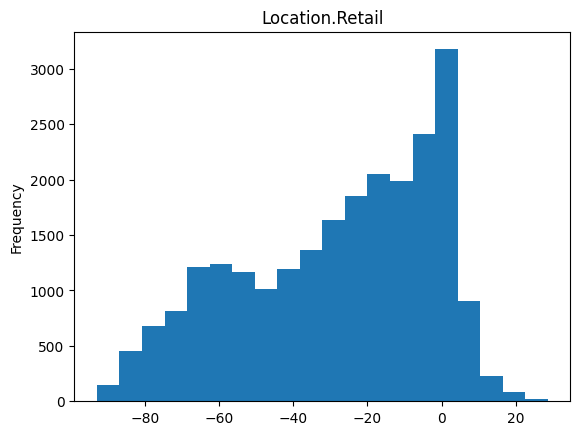

In [15]:
covid_mob_df['Location.Retail'].plot(kind='hist', bins=20, title='Location.Retail')
# plot shows how visitors to (or time spent in) retail spaces changed compared to the baseline days after COVID
# more people stopped spending time in retail spaces, while some still continued to go out regularly

In [16]:
cars_df = pdcorgis(corgis_list[7])
cars_df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [17]:
import seaborn as sns

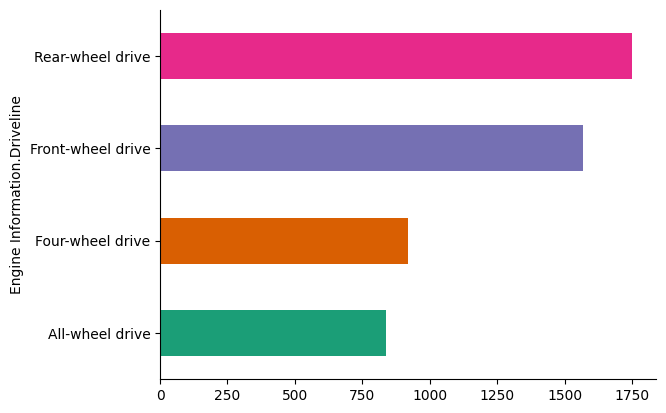

In [18]:
cars_df.groupby('Engine Information.Driveline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# shows the count of each type of drive

In [19]:
coffee_df = pdcorgis(corgis_list[9])
coffee_df.head()

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17,Unknown
3,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,8.00,7.83,8.00,7.92,7.83,10.0,10.0,0.00,85.08,Unknown
4,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.83,7.58,8.00,7.83,7.50,10.0,10.0,0.10,83.83,Unknown


In [20]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location.Country                989 non-null    object 
 1   Location.Region                 953 non-null    object 
 2   Location.Altitude.Min           989 non-null    int64  
 3   Location.Altitude.Max           989 non-null    int64  
 4   Location.Altitude.Average       989 non-null    int64  
 5   Year                            989 non-null    int64  
 6   Data.Owner                      984 non-null    object 
 7   Data.Type.Species               989 non-null    object 
 8   Data.Type.Variety               864 non-null    object 
 9   Data.Type.Processing method     927 non-null    object 
 10  Data.Production.Number of bags  989 non-null    int64  
 11  Data.Production.Bag weight      989 non-null    float64
 12  Data.Scores.Aroma               989 

In [21]:
avg_aroma_per_year = coffee_df.groupby('Year')['Data.Scores.Aroma'].mean().reset_index()

Text(0, 0.5, 'Average Aroma Score')

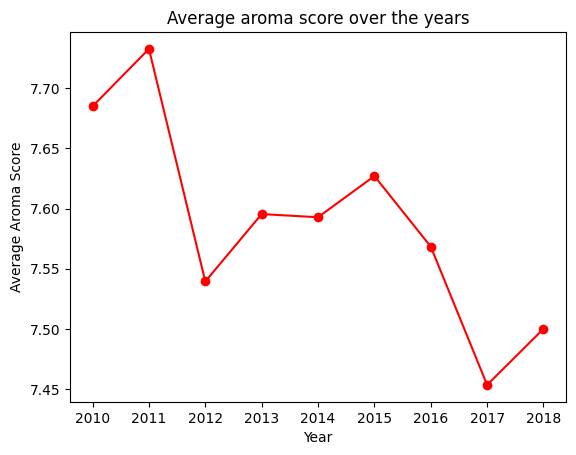

In [22]:
plt.plot(avg_aroma_per_year['Year'], avg_aroma_per_year['Data.Scores.Aroma'], marker='o', linestyle='-', color='r')
plt.title('Average aroma score over the years')
plt.xlabel('Year')
plt.ylabel('Average Aroma Score')

# Submit
Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top